<a href="https://colab.research.google.com/github/MatLock/UdeSa-Applied-Match---Optimization/blob/main/clase_02_minimos_cuadrados_y_errores_UdeSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.special import gamma
import matplotlib.pyplot as plt

In [ ]:
!pip install scipy

In [ ]:
tt = np.array([0, 1, 3, 4])
bb = np.array([1, 8, 8, 20])

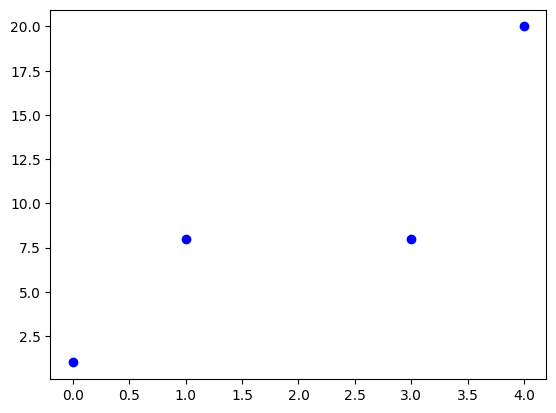

In [ ]:
plt.plot(tt, bb, "bo")

In [ ]:
A = np.array([[t, 1] for t in tt])
A

array([[0, 1],
       [1, 1],
       [3, 1],
       [4, 1]])

In [ ]:
A.T

array([[0, 1, 3, 4],
       [1, 1, 1, 1]])

In [ ]:
A.T @ A

array([[26,  8],
       [ 8,  4]])

In [ ]:
np.matmul(A.T, A)

array([[26,  8],
       [ 8,  4]])

In [ ]:
dd, cc = np.linalg.solve(A.T @ A, A.T @ bb)
print(dd)
print(cc)

3.800000000000001
1.6499999999999966


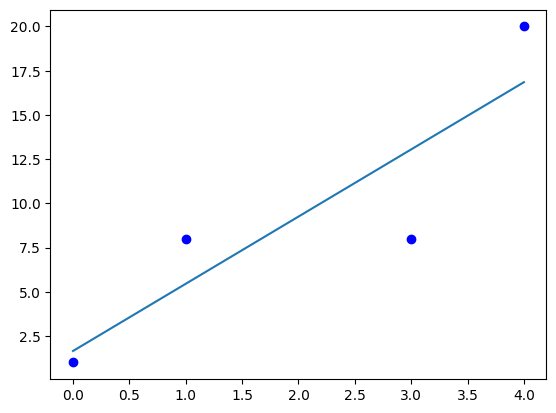

In [ ]:
plt.plot(tt, bb, "bo")
plt.plot(tt, dd*tt + cc)

In [ ]:
#calculo de errores
# formula = error valor dependiente - {[(prediccion pendiente * valor independiente) + prediccion constante)] al cuadrado}
# error total =  1/2 * (sumatoria de los errores)
errores = []
for ii in range(4):
  err = (bb[ii] - (dd*tt[ii] + cc))**2
  errores.append(err)
errores

[np.float64(0.42249999999999555),
 np.float64(6.502500000000013),
 np.float64(25.50250000000001),
 np.float64(9.92249999999999)]

In [ ]:
error_total = 0.5*np.sum(errores)
error_total

np.float64(21.175000000000004)

In [ ]:
hh = np.array([0, 0, 0, 0])
B = np.array([[1] for h in hh])
B


array([[1],
       [1],
       [1],
       [1]])

In [ ]:
gg = np.linalg.solve(B.T @ B, B.T @ bb)
gg

array([9.25])

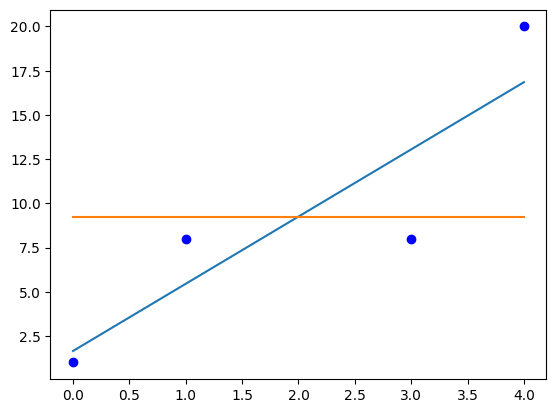

In [ ]:
plt.plot(tt, bb, "bo")
plt.plot(tt, dd*tt + cc,label ='y1')
plt.plot(tt, [gg,gg,gg,gg],label ='y2' )

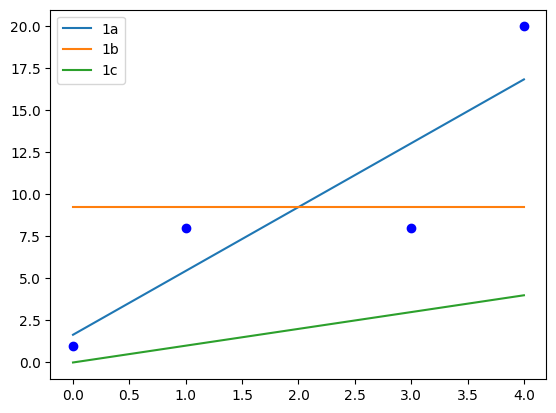

In [ ]:
dependant = np.array([0, 1, 3, 4])
dep_matrix = np.array([[dep,1] for dep in dependant])
v,cons = np.linalg.solve(dep_matrix.T @ dep_matrix, dep_matrix.T @ dependant)
plt.plot(tt, bb, "bo")
plt.plot(tt, dd*tt + cc,label ='1a')
plt.plot(tt, [gg,gg,gg,gg],label ='1b')
plt.plot(tt, v*tt + cons,label ='1c')
plt.legend()
plt.show()

vector de incognitas utilizando la otra ecuacion [a,b,c] [2.9        0.46666667 0.83333333]
parametro a: 2.9000000000000052
parametro b: 0.4666666666666545
parametro c: 0.8333333333333363


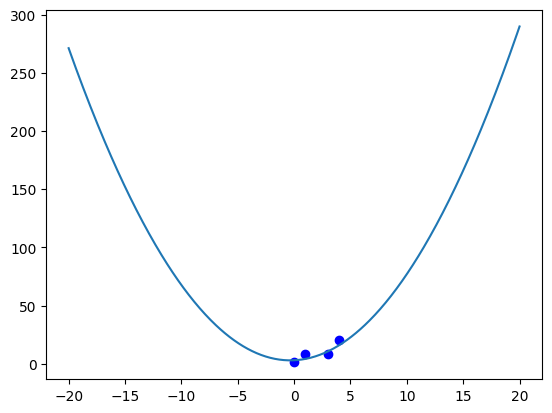

In [ ]:
#ejercicio 1d
# ecuacion de parabola y = ax**2 + bx + c
#repetir para parabola y = ct**2 + bt + a
tiempos = np.array([0, 1, 3, 4]) #tt xvar
mediciones = np.array([1, 8, 8, 20]) # bb yvar

#ecuaciones
# y = a + bx + cx**2
#----------------------

# 1 = a + b0 + c0**2
# 8 = a + b1 + c1**2
# 8 = a + b3 + c3**2
# 20 = a + b4 + c4**2

#vector de resultados
vector_resultados = mediciones
#matriz de coeficientes
matriz_coeficientes = np.array([[1,0,0],[1,1,1],[1,3,9],[1,4,16]])
#ecuacion
# ( A traspuesta) * A * vector de incognitas = (A traspuesta) * vector de resultados
a,b,c = np.linalg.solve(matriz_coeficientes.T @ matriz_coeficientes, matriz_coeficientes.T @ vector_resultados)
# utilizando la otra ecuacion me da el mismo resultado
# vector x = (inversa(A transpuesta * A)) * A transpuesta * vector de resultados
vector_incognitas = np.linalg.inv(matriz_coeficientes.T @ matriz_coeficientes) @ matriz_coeficientes.T @ vector_resultados;
print(f"vector de incognitas utilizando la otra ecuacion [a,b,c] {vector_incognitas}")
print(f"parametro a: {a}")
print(f"parametro b: {b}")
print(f"parametro c: {c}")
fig, subplot = plt.subplots();


x = np.linspace(-20,20,500)
y = a + b*x + (c*x)** 2;
subplot.plot(tt, bb, "bo")
subplot.plot(x,y)


coeficiente: 0.12925271122005325
coeficiente: 2.0139769534195087


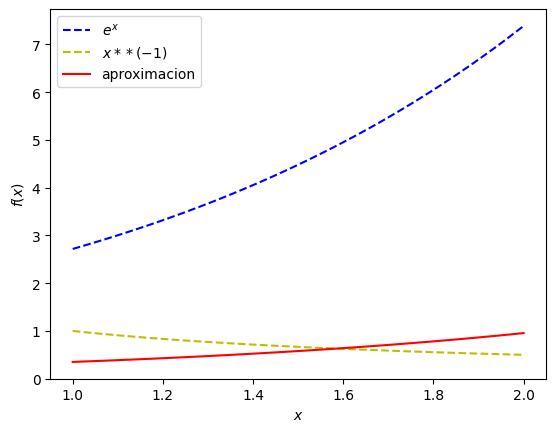

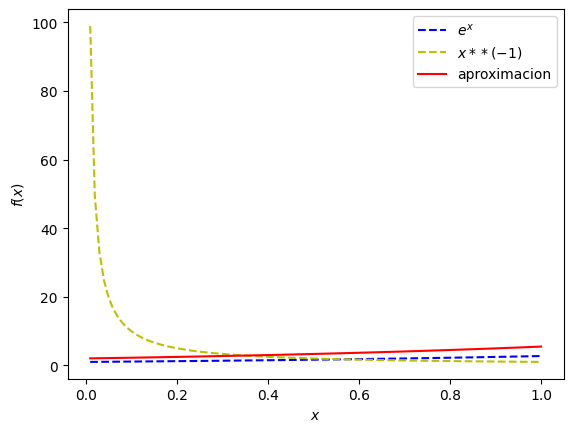

In [ ]:
#EJERCICIO 2 PARCIAL

#para una sola funcion x**(-) = e**x
def ejercicio2_aproximacion_funcion_inversa(plot_id,exluir_valor_inicial,intervalo_x, intervalo_y):
  # Grafiquemos las tres funciones que pide el problema
  # Arrancamos por la exponencial
  # funcion exponencial f(x)= e**x
  xx = np.linspace(intervalo_x, intervalo_y, num=100)[1:] if exluir_valor_inicial else np.linspace(intervalo_x, intervalo_y, num=100)
  plt.figure(plot_id)
  plt.plot(xx, np.exp(xx), 'b--', label='$e^x$')
  #funcion inversa f(x) = x** (-1)
  plt.plot(xx, np.power(xx,-1), 'y--',label='$x**(-1)$')
  # le pedimos que escriba las leyendas y ejes

  #obtengo todas las y en el intervalo para la funcion e**x
  yes_exp = np.exp(xx);
  #obtengo todas las y en el intervalo para la funcion x**-1
  yes_x_inversa = np.power(xx,-1);


  matriz_coeficientes_exp = np.array([[y] for y in yes_exp])
  vector_resultados_inversa = np.array(yes_x_inversa);


  #ecuacion
  # que vector a multiplicado por la matriz de coeficientes de e**x se aproxima a x**(-1) dentro del intervalo [1,2]
  #f(x) => y (x**-1) = a * e**x
  #        x**-1 = a * e**x
  coeficiente = np.linalg.solve(matriz_coeficientes_exp.T @ matriz_coeficientes_exp, matriz_coeficientes_exp.T @ vector_resultados_inversa)
  print(f"coeficiente: {coeficiente.item(0)}")

  #resultado
  #f(x) => x**-1 = 0.12925271 * e**x para intervalo [1,2]
  #f(x) => x**-1 = 2.0139769534195087 * e**x para intervalo (1,2]
  plt.plot(xx, coeficiente.item(0) * np.exp(xx),'r-', label="aproximacion")
  plt.legend()
  plt.xlabel('$x$')
  plt.ylabel('$f(x)$')

ejercicio2_aproximacion_funcion_inversa(0,False,1,2);
# en el intervalo [0,1] tira error de potencia negativa para el valor 0
# tuve que exlucir al 0 porque el coeficiente me daba infinito y la potencia negativa de 0 tiraba warning
ejercicio2_aproximacion_funcion_inversa(1,True,0,1);



 e**(x) param 0.650028600842996
 sin(x) param -1.896903938351144
 gamma(x) param 0.998933765190684
total error: 0.16524983363221965


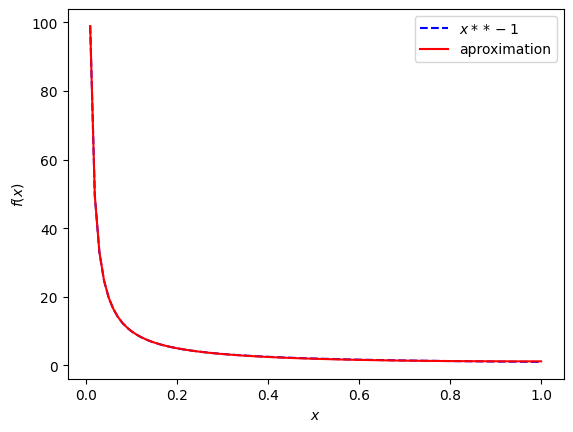

In [ ]:
#EJERCICIO 2 combinando las 3 funciones
#¿Qué tan bien puede una combinación lineal de las funcione ex, sin(x) and Γ(x) aproximar la función f (x) = x−1 en el intervalo [1, 2]? ¿y en el intervalo [0, 1]?
#Responda ambas preguntas discretizando los respectivos intervalos y realizando un ajuste por cuadrados mínimos.
def ex2(interval_x, interval_y):

  #excluyo el 0 del intervalo ya que x**-1 = da division por 0
  x_values = np.linspace(interval_x, interval_y, num=100)[1:] if interval_x == 0 else np.linspace(interval_x, interval_y, num=100)
  y_values_exp = np.exp(x_values)
  y_values_sin = np.sin(x_values)
  y_values_gamma = gamma(x_values)
  y_values_inverse_exponential = np.power(x_values,-1)
  #ecuacion
  # y_values_inverse_exponential = a y_values_exp + b * y_values_sin + c * y_values_gamma

  matrix = []
  for exp_value,sin_value,gamma_value in zip(y_values_exp,y_values_sin,y_values_gamma):
    matrix.append([exp_value,sin_value, gamma_value])

  np_matrix = np.array(matrix)
  result_vector = np.array(y_values_inverse_exponential)
  exp_param,sin_param,gamma_param = np.linalg.solve(np_matrix.T @ np_matrix, np_matrix.T @ result_vector)
  #la otra ecuacion tambien funciona
  #s = np.linalg.inv(np_matrix.T @ matrix) @ np_matrix.T @ result_vector;

  print(f" e**(x) param {exp_param}")
  print(f" sin(x) param {sin_param}")
  print(f" gamma(x) param {gamma_param}")

  y_values_combination = [exp_param*x + sin_param*y + gamma_param*z for x,y,z in zip(y_values_exp,y_values_sin,y_values_gamma)]

  plt.plot(x_values, y_values_inverse_exponential, 'b--', label='$x**-1$')
   #aprox function => x**-1 = a * e**x +  b sin(x) + c * gamma(x) for inverval [1,2]
  plt.plot(x_values, y_values_combination  ,'r',label='aproximation')
  plt.legend()
  plt.xlabel('$x$')
  plt.ylabel('$f(x)$')

  errors = []
  for index in range(len(x_values)):
    err = (y_values_inverse_exponential[index] - (exp_param * y_values_exp[index] + sin_param * y_values_sin[index] + gamma_param * y_values_gamma[index]))**2
    errors.append(err)

  total_error = 0.5*np.sum(errors)
  print(f"total error: {total_error}")

#intervalo (0,1]
ex2(0,1)
#intervalo [1,2]
#ex2(1,2)